# Análise de Dados - UFPB

**Professor** : Marcus Carvalho

Aluno: [Insira seu nome]

## Laboratório: Análise Exploratória de Dados

Você deve usar os dados de séries do IMDB (_Internet Movie DataBase_) para fazer uma análise exploratória de dados de um seriado. Os dados estão no arquivo `'dados/avaliacao_episodios_series_top.csv`. Você deve escolher uma das séries que estão no arquivo para analisar. A série deve ter no mínimo 4 temporadas para permitir uma análise mais detalhada. A análise deve ser feita neste relatório Jupyter Notebook.  O relatório já possui algumas perguntas a serem respondidas. Use as perguntas como base, mas não fique preso a elas. Você pode fazer novas perguntas e novas análises à vontade.

Abaixo tem o código de exemplo para carregar os dados dos episódios e filtrar uma série específica. Modifique o código para filtra a série da sua escolha, depois realize as análises solicitadas a seguir.

In [190]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')
import seaborn as sns
import numpy as np


# Substitua o filtro com o nome da série que você deseja analisar
episodios = (
    pd.read_csv('dados/avaliacao_episodios_series_top.csv')
    .query("nome_serie == '13 Reasons Why'")
)
episodios.head(5)

#a = pd.read_csv('dados/avaliacao_episodios_series_top.csv')
#a[a["nome_serie"].str.startswith('O')].groupby(["nome_serie"]).describe()


,id_serie,nome_serie,id_episodio,temporada,num_episodio,nome_episodio,ano,generos,duracao_minutos,avaliacao_media,num_votos
0,tt1837492,13 Reasons Why,tt5174246,1.0,1.0,"Tape 1, Side A",2017,"Drama,Mystery,Thriller",54.0,8.2,7884
1,tt1837492,13 Reasons Why,tt5174248,1.0,2.0,"Tape 1, Side B",2017,"Drama,Mystery,Thriller",52.0,7.9,6598
2,tt1837492,13 Reasons Why,tt5174250,1.0,3.0,"Tape 2, Side A",2017,"Drama,Mystery,Thriller",57.0,7.8,6218
3,tt1837492,13 Reasons Why,tt5174252,1.0,4.0,"Tape 2, Side B",2017,"Drama,Mystery,Thriller",57.0,8.0,5990
4,tt1837492,13 Reasons Why,tt5174254,1.0,5.0,"Tape 3, Side A",2017,"Drama,Mystery,Thriller",59.0,8.1,5927


## Popularidade dos episódios

### Qual a distribuição de votos que cada episódio teve?

Explore a popularidade de cada episódio analisando a quantidade de votos que cada um recebeu (`num_votos`). Exiba visualizações das distribuções e calcule estatísticas  de centralidade (media, mediana e moda ) e dispersão para esta variável.


<Axes: xlabel='num_votos', ylabel='Count'>

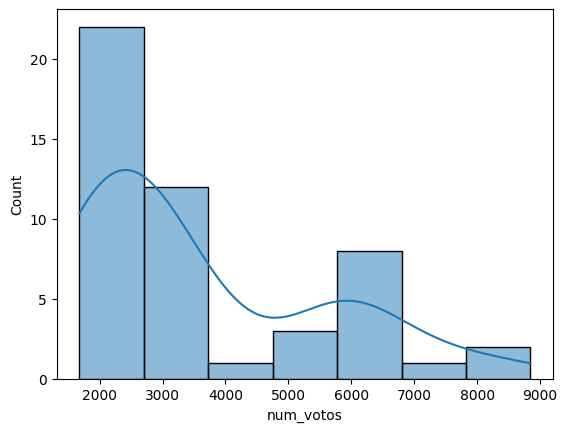

In [19]:
sns.histplot(data= episodios, x="num_votos", kde=True)




aqui foi feito as estatísticas de centralidade (média, moda e mediana)

In [35]:

num_votos = episodios["num_votos"]
print(f"Média: {num_votos.mean()} / Mediana: {num_votos.median()} / Moda: {num_votos.mode()[0]}")

Média: 3627.8979591836733 / Mediana: 3030.0 / Moda: 1679




desvio_padrao_popularidade é o desvio padrão da quantidade de votos.

amplitude_popularidade é a amplitude, que é a diferença entre o valor máximo e mínimo.

iqr_popularidade é o IQR, que é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1).

In [193]:

desvio_padrao_popularidade = episodios['num_votos'].std()
amplitude_popularidade = (episodios['num_votos']) 
q1_popularidade = episodios['num_votos'].quantile(0.25)
q3_popularidade = episodios['num_votos'].quantile(0.75)
iqr_popularidade = q3_popularidade - q1_popularidade

print(f'Desvio Padrão da Popularidade: {desvio_padrao_popularidade:.2f}')
print(f'Amplitude da Popularidade: {amplitude_popularidade}')
print(f'IQR da Popularidade: {iqr_popularidade}')


Desvio Padrão da Popularidade: 1937.04
Amplitude da Popularidade: 0     7884
1     6598
2     6218
3     5990
4     5927
5     5721
6     5832
7     5648
8     5782
9     5790
10    7667
11    6659
12    8847
13    4048
14    3488
15    3325
16    3152
17    3081
18    3404
19    3037
20    3030
21    3131
22    2987
23    3338
24    3187
25    5405
26    2741
27    2384
28    2240
29    2158
30    2087
31    2068
32    2069
33    2149
34    1962
35    1995
36    2043
37    2173
38    2698
39    2096
40    1875
41    1920
42    2001
43    1767
44    1970
45    1679
46    1891
47    1925
48    2700
Name: num_votos, dtype: int64
IQR da Popularidade: 3579.0


### Qual o episódio mais popular (com mais votos)?

Nome do episódio que foi mais assitido.

In [47]:

episodios['nome_episodio'].max()


'You Can Tell the Heart of a Man by How He Grieves'

Quantidade da popularidade do episódio

In [48]:
episodios['num_votos'].max()

8847

### Qual o episódio menos popular (com menos votos)?

Nome do episódio menos popular

In [49]:
episodios['nome_episodio'].min()

'Acceptance/Rejection'

Quantidade de popularidade do episódio

In [50]:
episodios['num_votos'].min()

1679

### Qual a temporada mais popular?

Estou mostrando qual foi a temporada mais popular, comparando com o groupby as temporadas e o número de votos.

In [59]:

resultados = episodios.groupby('temporada')['num_votos'].mean()  # ou .sum()

temporada_mais_popular = resultados.idxmax()

print(f"temporada mais popular: {temporada_mais_popular}")

temporada mais popular: 1.0


### Qual a temporada menos popular?

Estou mostrando qual foi a temporada menos popular, comparando com o groupby as temporadas e o número de votos.

In [62]:
resultados = episodios.groupby('temporada')['num_votos'].mean()  

temporada_menos_popular = resultados.idxmin()

print(f"temporada menos popular: {temporada_menos_popular}")

temporada menos popular: 4.0


## Qualidade dos episódios

### Qual a distribuição de avaliações que cada episódio teve?

Explore a qualidade de cada episódio analisando a avaliação média que cada um recebeu (`avaliacao_media`). Exiba visualizações das distribuções e calcule estatísticas de centralidade e dispersão para esta variável.


In [91]:
media_avaliacao_por_episodio = episodios.groupby('nome_episodio')['avaliacao_media'].mean()

print(media_avaliacao_por_episodio)

nome_episodio
Acceptance/Rejection                                                        6.2
Always Waiting for the Next Bad News                                        6.6
And Then the Hurricane Hit                                                  7.7
Angry, Young and Man                                                        6.8
Bryce and Chloe                                                             8.3
Bye                                                                         6.5
College Interview                                                           5.9
College Tour                                                                5.7
Graduation                                                                  7.7
House Party                                                                 6.2
If You're Breathing, You're a Liar                                          6.5
In High School, Even on a Good Day, It's Hard to Tell Who's on Your Side    7.4
Let the Dead Bury the Dead

Foi feita duas visualizações : 

1- mostra as avaliações ao dercorrer da série 
2- contagem da média geral dos espísodios

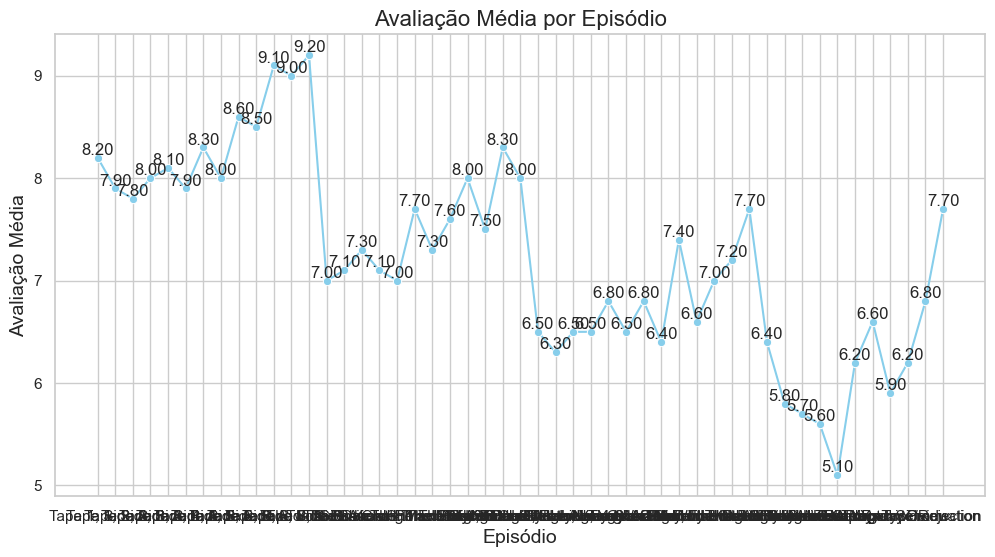

<Axes: xlabel='avaliacao_media', ylabel='Count'>

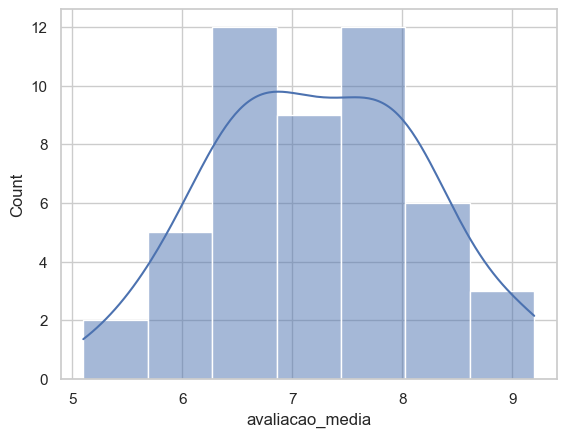

In [92]:

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(x='nome_episodio', y='avaliacao_media', data= episodios, marker='o', color='skyblue')


plt.title('Avaliação Média por Episódio', fontsize=16)
plt.xlabel('Episódio', fontsize=14)
plt.ylabel('Avaliação Média', fontsize=14)

for x, y in zip(episodios['nome_episodio'], episodios['avaliacao_media']):
    lineplot.text(x, y, f'{y:.2f}', ha='center', va='bottom')


plt.show()


sns.histplot(data= episodios, x="avaliacao_media", kde=True)

Aqui você vai ver as estatisticas de centralidade (moda, mediana e a média).

In [93]:
avaliacao_media = episodios["avaliacao_media"]
print(f"Média: {avaliacao_media.mean()} / Mediana: {avaliacao_media.median()} / Moda: {avaliacao_media.mode()[0]}")

Média: 7.238775510204081 / Mediana: 7.2 / Moda: 6.5


In [191]:
qualidade_stats = episodios['avaliacao_media'].describe()


desvio_padrao_qualidade = np.std(episodios['avaliacao_media'])


amplitude_qualidade = episodios['avaliacao_media'].max() - episodios['avaliacao_media'].min()

q1_qualidade = episodios['avaliacao_media'].quantile(0.25)
q3_qualidade = episodios['avaliacao_media'].quantile(0.75)
iqr_qualidade = q3_qualidade - q1_qualidade

print('Estatísticas Descritivas para Qualidade (Avaliação Média):')
print(qualidade_stats)
print(f'\nDesvio Padrão: {desvio_padrao_qualidade:.2f}')
print(f'Amplitude: {amplitude_qualidade}')
print(f'IQR: {iqr_qualidade}')


Estatísticas Descritivas para Qualidade (Avaliação Média):
count    49.000000
mean      7.238776
std       0.956081
min       5.100000
25%       6.500000
50%       7.200000
75%       8.000000
max       9.200000
Name: avaliacao_media, dtype: float64

Desvio Padrão: 0.95
Amplitude: 4.1
IQR: 1.5


### Qual o melhor episódio da série de acordo com as avaliações do IMDB?

o melhor episódio foi escolhido pela maior avaliaçao, tirei a media das avaliações e a maior para dar esse resultado: Tape 7, Side A

In [98]:

resultados = episodios.groupby('nome_episodio')['avaliacao_media'].mean()  

melhor_episodio_imdb = resultados.idxmax()

print(f" melhor episódio o imdb: {melhor_episodio_imdb}")

 melhor episódio o imdb: Tape 7, Side A


### Qual o pior episódio da série de acordo com as avaliações do IMDB?

O melhor episódio foi escolhido pela menor avaliaçao, tirei a media das avaliações e a menor para dar esse resultado: Senior Camping Trip

In [100]:
resultados = episodios.groupby('nome_episodio')['avaliacao_media'].mean()  

pior_episodio_imdb = resultados.idxmin()

print(f" O pior episódio do imdb: {pior_episodio_imdb}")

 O pior episódio do imdb: Senior Camping Trip


### Qual a melhor temporada da série de acordo com as avaliações do IMDB?

foi achado a melhor temporada, foi tirada a média das avaliações e pego a de maior (max) avaliação.

In [104]:
resultados = episodios.groupby('temporada')['avaliacao_media'].mean() 

melhor_temporada_imdb = resultados.idxmax()

print(f" melhor temporada pelo imdb: {melhor_temporada_imdb}")

 melhor temporada pelo imdb: 1.0


### Qual a pior temporada da série de acordo com as avaliações do IMDB?

foi achado a pior temporada, foi tirada a média das avaliações e pego a de menor (min) avaliação.

In [103]:
resultados = episodios.groupby('temporada')['avaliacao_media'].mean() 

pior_temporada_imdb = resultados.idxmin()

print(f" pior temporada pelo imdb: {pior_temporada_imdb}")

 melhor temporada pelo imdb: 4.0


## Relação entre variáveis

Analise a relação entre as variáveis referentes a cada episódio. Explore visualmente a relação entre elas e calcula estatísticas de correlação.

### Existe alguma relação entre a quantidade de votos recebida e a avaliação média dos episódios?

Aqui foi feita a relação entre os dois e é visto uma relação de crescimento.

Correlação: 0.12074508260854974


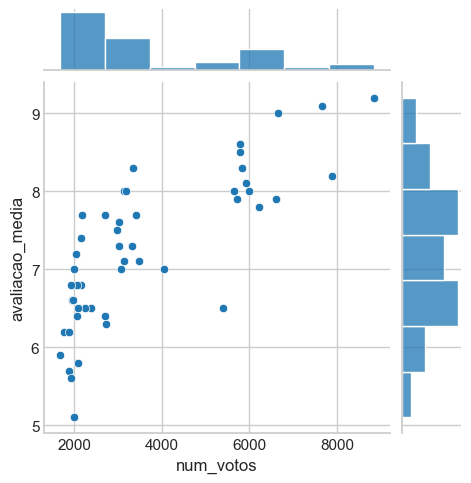

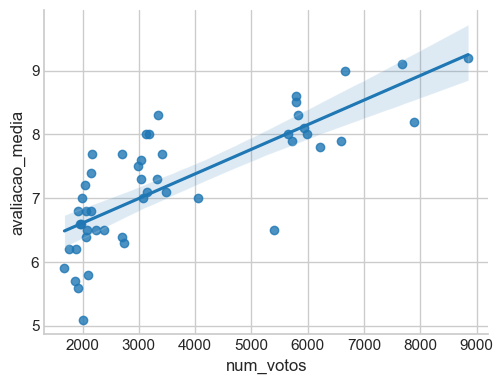

In [145]:

relacao = sns.jointplot(x='num_votos', y='avaliacao_media', height=5, data=episodios)

sns.lmplot(x='num_votos', y='avaliacao_media', data=episodios, height=4, aspect=1.3)
print(f"Correlação: {episodios.num_votos.corr(episodios.num_episodio)}")

In [161]:



correlacao_pearson = episodios['avaliacao_media'].corr(episodios['num_votos'], method='pearson')
correlacao_spearman = episodios['avaliacao_media'].corr(episodios['num_votos'], method='spearman')
correlacao_kendall = episodios['avaliacao_media'].corr(episodios['num_votos'], method='kendall')


print(f'\nEstatística de Correlação de Pearson: {correlacao_pearson:.2f}')
print(f'Estatística de Correlação de Spearman: {correlacao_spearman:.2f}')
print(f'Estatística de Correlação de Kendall: {correlacao_kendall:.2f}')




Estatística de Correlação de Pearson: 0.78
Estatística de Correlação de Spearman: 0.82
Estatística de Correlação de Kendall: 0.62


### Existe alguma relação entre a quantidade de votos recebida e o número do episódio?

Os dados estão bem espalhados e não está tendo uma correlação.

Correlação: 0.12074508260854974


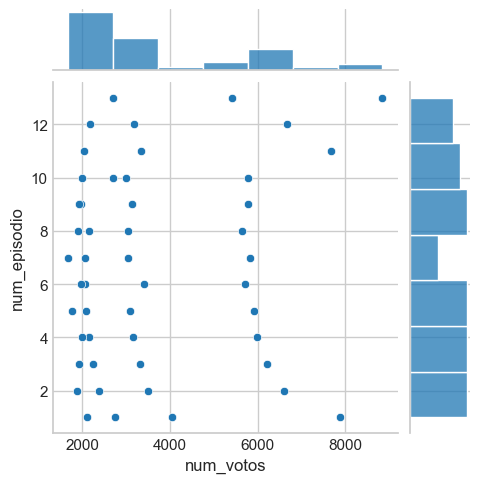

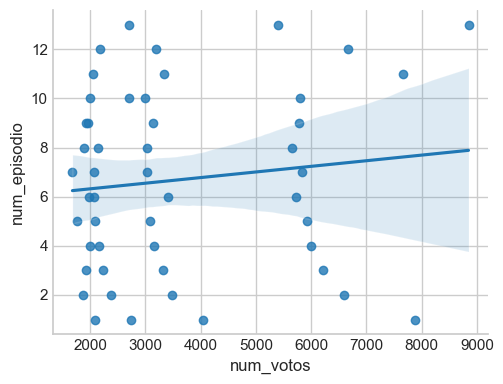

In [142]:
relacao = sns.jointplot(x='num_votos', y='num_episodio', height=5, data=episodios)


sns.lmplot(x='num_votos', y='num_episodio', data=episodios, height=4, aspect=1.3)
print(f"Correlação: {episodios.num_votos.corr(episodios.num_episodio)}")

In [162]:
correlacao_pearson = episodios['num_episodio'].corr(episodios['num_votos'], method='pearson')
correlacao_spearman = episodios['num_episodio'].corr(episodios['num_votos'], method='spearman')
correlacao_kendall = episodios['num_episodio'].corr(episodios['num_votos'], method='kendall')


print(f'\nEstatística de Correlação de Pearson: {correlacao_pearson:.2f}')
print(f'Estatística de Correlação de Spearman: {correlacao_spearman:.2f}')
print(f'Estatística de Correlação de Kendall: {correlacao_kendall:.2f}')


Estatística de Correlação de Pearson: 0.12
Estatística de Correlação de Spearman: 0.06
Estatística de Correlação de Kendall: 0.03


## Padrões temporais

Explore as avaliações de temporadas e episódios ao longo do tempo.

### As primeiras temporadas são melhor avaliadas do que as últimas?

Aqui calculei as médias das primeiras e últimas temporadas, depois usei  o teste temporada para para verificar se há uma diferença entre as médias das avaliações para as primeiras e últimas temporadas, e sim há diferença nas avaliações.

In [167]:


primeiras_temporadas = episodios[episodios['temporada'] <= 2]  
ultimas_temporadas = episodios[episodios['temporada'] > 2]  

media_primeiras_temporadas = primeiras_temporadas['avaliacao_media'].mean()
media_ultimas_temporadas = ultimas_temporadas['avaliacao_media'].mean()


print(f'Média das Avaliações para as Primeiras Temporadas: {media_primeiras_temporadas:.2f}')
print(f'Média das Avaliações para as Últimas Temporadas: {media_ultimas_temporadas:.2f}')


from scipy.stats import ttest_ind

t_stat, p_valor = ttest_ind(primeiras_temporadas['avaliacao_media'], ultimas_temporadas['avaliacao_media'])

print(f'\nResultado do Teste temporadas :')
print(f'Estatística temporada: {t_stat:.2f}')


if p_valor < 0.05:
    print('\nHá evidências estatísticas de diferença nas médias.')
else:
    print('\nNão há evidências estatísticas de diferença nas médias.')




Média das Avaliações para as Primeiras Temporadas: 7.88
Média das Avaliações para as Últimas Temporadas: 6.51

Resultado do Teste temporadas :
Estatística temporada: 7.23

Há evidências estatísticas de diferença nas médias.


### Os episódios no fim das temporadas são melhor avaliados do que os do início?

Neste código, dividir os episódios em duas partes, considerando o início e o fim das temporadas. Calculei as médias das avaliações para cada parte e realizei um teste episodio  para amostras independentes para verificar se há uma diferença significativa nas médias. e fiz um gráfico  que compara a distribuição das avaliações para os episódios no início e no fim das temporadas. Cada caixa representa a distribuição interquartil (IQR), enquanto as linhas horizontais dentro das caixas indicam as medianas.

Média das Avaliações para Episódios no Início das Temporadas: 8.09
Média das Avaliações para Episódios no Fim das Temporadas: 6.72

Resultado do Teste episodio:
Estatística =episodio: 5.71

Há evidências estatísticas de diferença nas médias.


C:\Users\rober\AppData\Local\Temp\ipykernel_28096\2222983566.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grupo', y='avaliacao_media', data=pd.concat([episodios_inicio.assign(grupo='Início'), episodios_fim.assign(grupo='Fim')]), palette='viridis')


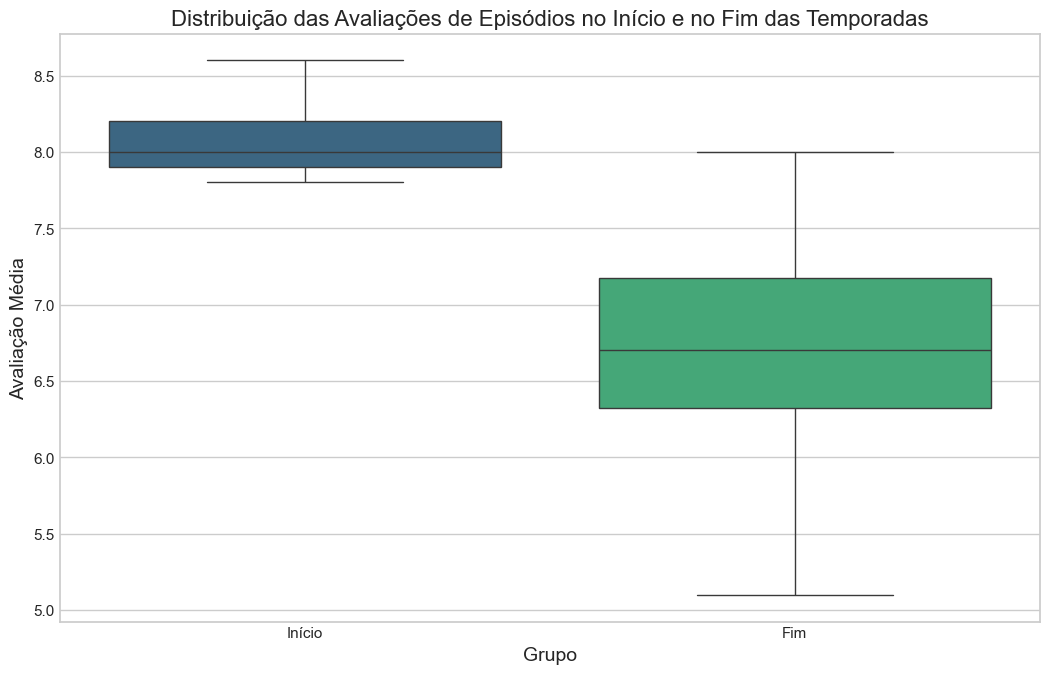

In [173]:

percentil_inicio = 0.2
percentil_fim = 0.4


df = episodios.sort_values(['temporada', 'nome_episodio'])


indice_inicio = int(len(df) * percentil_inicio)
indice_fim = int(len(df) * percentil_fim)

episodios_inicio = df.iloc[:indice_inicio]
episodios_fim = df.iloc[indice_fim:]


media_avaliacoes_inicio = episodios_inicio['avaliacao_media'].mean()
media_avaliacoes_fim = episodios_fim['avaliacao_media'].mean()


print(f'Média das Avaliações para Episódios no Início das Temporadas: {media_avaliacoes_inicio:.2f}')
print(f'Média das Avaliações para Episódios no Fim das Temporadas: {media_avaliacoes_fim:.2f}')

t_stat, p_valor = ttest_ind(episodios_inicio['avaliacao_media'], episodios_fim['avaliacao_media'])


print(f'\nResultado do Teste episodio:')
print(f'Estatística =episodio: {t_stat:.2f}')


if p_valor < 0.05:
    print('\nHá evidências estatísticas de diferença nas médias.')
else:
    print('\nNão há evidências estatísticas de diferença nas médias.')


import seaborn as sns
import matplotlib.pyplot as plt


percentil_inicio = 0.2
percentil_fim = 0.4

df = df.sort_values(['temporada', 'nome_episodio'])


indice_inicio = int(len(df) * percentil_inicio)
indice_fim = int(len(df) * percentil_fim)

episodios_inicio = df.iloc[:indice_inicio]
episodios_fim = df.iloc[indice_fim:]


plt.figure(figsize=(10, 6))
sns.boxplot(x='grupo', y='avaliacao_media', data=pd.concat([episodios_inicio.assign(grupo='Início'), episodios_fim.assign(grupo='Fim')]), palette='viridis')


plt.title('Distribuição das Avaliações de Episódios no Início e no Fim das Temporadas', fontsize=16)
plt.xlabel('Grupo', fontsize=14)
plt.ylabel('Avaliação Média', fontsize=14)


plt.show()



### Qual é a temporada mais regular? (com menor variação de avaliações)

calculei o desvio padrão das avaliações para cada temporada e em seguida identifiquei aquela com a menor variação. logo depois fiz um gráfico de boxplot que demonstra a distribuição das avaliações para cada temporada, permitindo que você identifique temporadas com menor variação.

Temporada mais regular: 3.0
Menor variação: 0.43


C:\Users\rober\AppData\Local\Temp\ipykernel_28096\4073555792.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='temporada', y='avaliacao_media', data=df, palette='viridis')


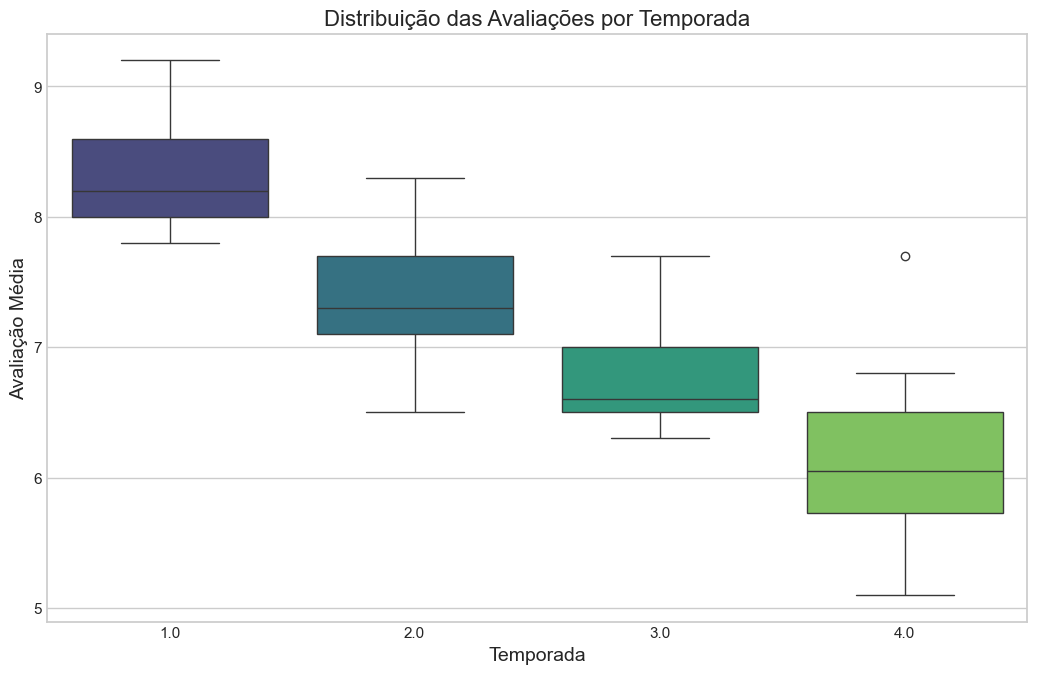

In [176]:

variacoes_por_temporada = df.groupby('temporada')['avaliacao_media'].std()

temporada_mais_regular = variacoes_por_temporada.idxmin()
menor_variacao = variacoes_por_temporada.min()

print(f'Temporada mais regular: {temporada_mais_regular}')
print(f'Menor variação: {menor_variacao:.2f}')

plt.figure(figsize=(10, 6))
sns.boxplot(x='temporada', y='avaliacao_media', data=df, palette='viridis')


plt.title('Distribuição das Avaliações por Temporada', fontsize=16)
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('Avaliação Média', fontsize=14)


plt.show()




### Qual é a temporada mais instável? (com maior variação de avaliações)

Neste código calculei o desvio padrão das avaliações para cada temporada e identificar aquela com a maior variação. depois fiz um gráfico de barras  que exibe a variação das avaliações (calculada como desvio padrão) para cada temporada. Cada barra representa uma temporada, e a altura da barra indica a variação. A barras mais altas indicam temporadas com maior variação nas avaliações.

Temporada mais instável: 4.0
Maior variação: 0.73


C:\Users\rober\AppData\Local\Temp\ipykernel_28096\4267330532.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_variacao = sns.barplot(x=variacoes_por_temporada.index, y=variacoes_por_temporada.values, palette='viridis')


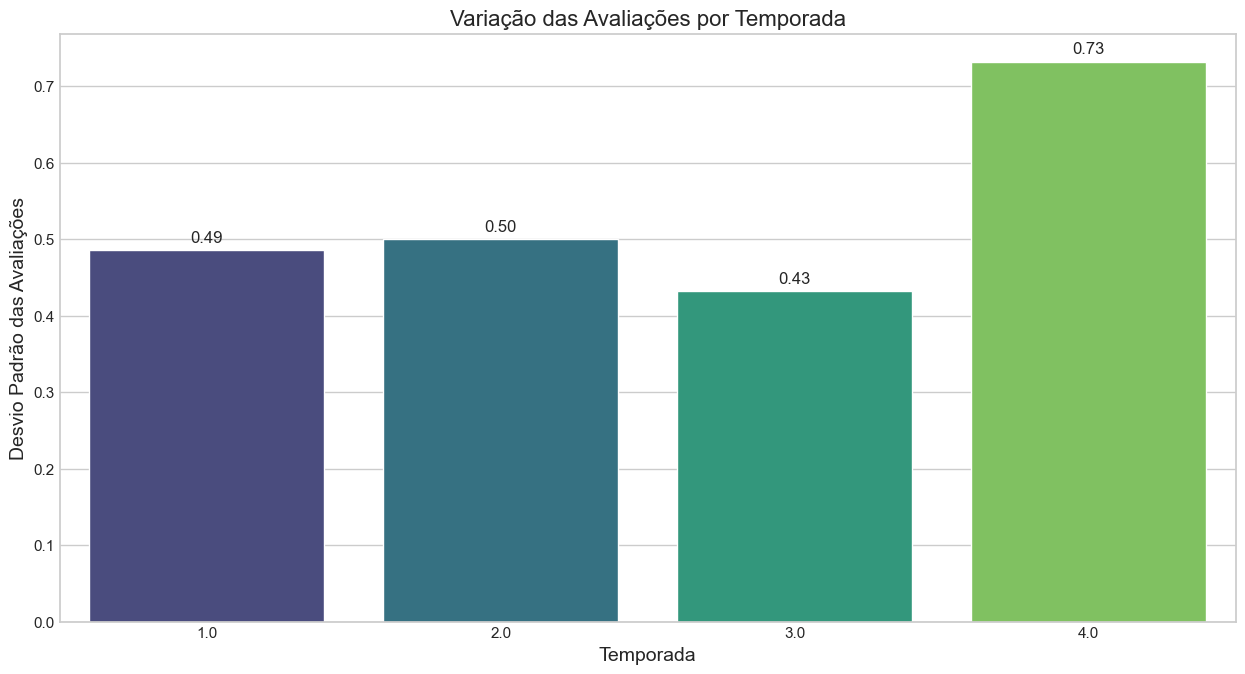

In [179]:

variacoes_por_temporada = df.groupby('temporada')['avaliacao_media'].std()


temporada_mais_instavel = variacoes_por_temporada.idxmax()
maior_variacao = variacoes_por_temporada.max()


print(f'Temporada mais instável: {temporada_mais_instavel}')
print(f'Maior variação: {maior_variacao:.2f}')


variacoes_por_temporada = df.groupby('temporada')['avaliacao_media'].std()


plt.figure(figsize=(12, 6))
barplot_variacao = sns.barplot(x=variacoes_por_temporada.index, y=variacoes_por_temporada.values, palette='viridis')


plt.title('Variação das Avaliações por Temporada', fontsize=16)
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('Desvio Padrão das Avaliações', fontsize=14)


for p in barplot_variacao.patches:
    barplot_variacao.annotate(format(p.get_height(), '.2f'), 
                              (p.get_x() + p.get_width() / 2., p.get_height()), 
                              ha='center', va='center', 
                              xytext=(0, 9), 
                              textcoords='offset points')


plt.show()



## Valores incomuns

Existem outliers nos dados?

### Existem episódios outliers em termos de popularidade?

Neste código, primeiro calculei os limites inferior e superior com base no IQR. Em seguida, os episódios que têm um número de votos fora dessa faixa como outliers. Esses episódios são impressos e também marcados em vermelho no boxplot.

Episódios Outliers:
Empty DataFrame
Columns: [temporada, nome_episodio, num_votos]
Index: []


C:\Users\rober\AppData\Local\Temp\ipykernel_28096\4173454563.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='temporada', y='num_votos', data=df, palette='viridis')


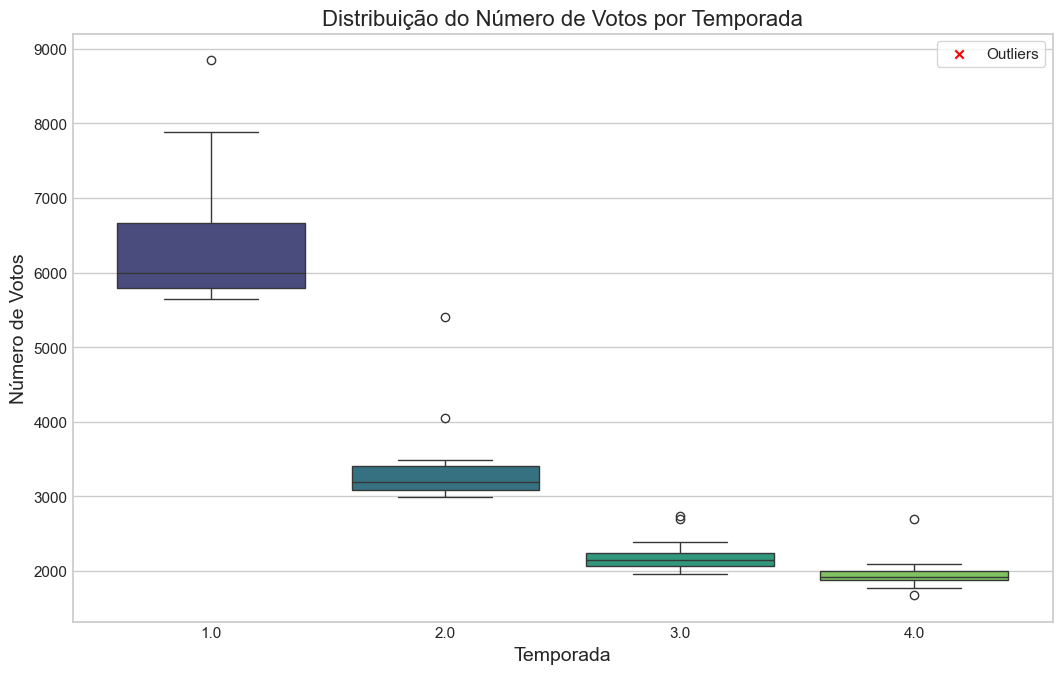

In [183]:

q1 = episodios['num_votos'].quantile(0.25)
q3 = episodios['num_votos'].quantile(0.75)
iqr = q3 - q1


limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr


outliers = episodios[(episodios['num_votos'] < limite_inferior) | (df['num_votos'] > limite_superior)]


print('Episódios Outliers:')
print(outliers[['temporada', 'nome_episodio', 'num_votos']])

plt.figure(figsize=(10, 6))
sns.boxplot(x='temporada', y='num_votos', data=df, palette='viridis')

plt.title('Distribuição do Número de Votos por Temporada', fontsize=16)
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('Número de Votos', fontsize=14)

plt.scatter(outliers['temporada'], outliers['num_votos'], color='red', marker='x', label='Outliers')

plt.legend()
plt.show()







### Existem episódios outliers em termos de avaliação recebida?


Neste código, o método quantile é utilizado para calcular os quartis e o IQR para avaliações médias. Em seguida, são definidos limites para identificação de outliers. Os episódios que têm uma avaliação média fora dessa faixa são considerados outliers e são marcados em vermelho no gráfico de dispersão.

Episódios Outliers em Termos de Avaliação:
Empty DataFrame
Columns: [temporada, nome_episodio, avaliacao_media]
Index: []


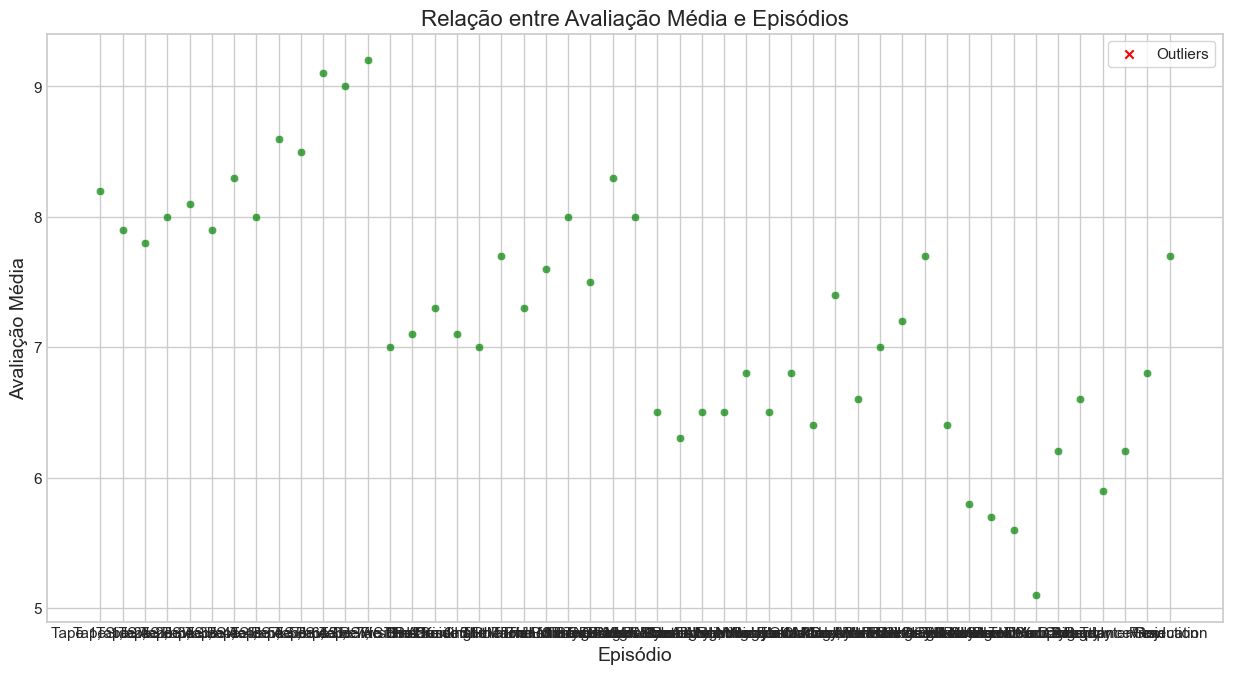

In [186]:
q1 = episodios['avaliacao_media'].quantile(0.25)
q3 = episodios['avaliacao_media'].quantile(0.75)
iqr = q3 - q1


limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers_avaliacao = episodios[(episodios['avaliacao_media'] < limite_inferior) | (episodios['avaliacao_media'] > limite_superior)]


print('Episódios Outliers em Termos de Avaliação:')
print(outliers_avaliacao[['temporada', 'nome_episodio', 'avaliacao_media']])


plt.figure(figsize=(12, 6))
scatterplot_avaliacao = sns.scatterplot(x='nome_episodio', y='avaliacao_media', data=episodios, color='green', alpha=0.7)


plt.title('Relação entre Avaliação Média e Episódios', fontsize=16)
plt.xlabel('Episódio', fontsize=14)
plt.ylabel('Avaliação Média', fontsize=14)


plt.scatter(outliers_avaliacao['nome_episodio'], outliers_avaliacao['avaliacao_media'], color='red', marker='x', label='Outliers')


plt.legend()
plt.show()


## Outras análises

Fique livre para explorar outras análises, fazer novas perguntas e comparar padrões nos dados de uma série com os de outra série.

Aqui eu fiz uma relação entre a valiação média e número e votos por cada temporada.

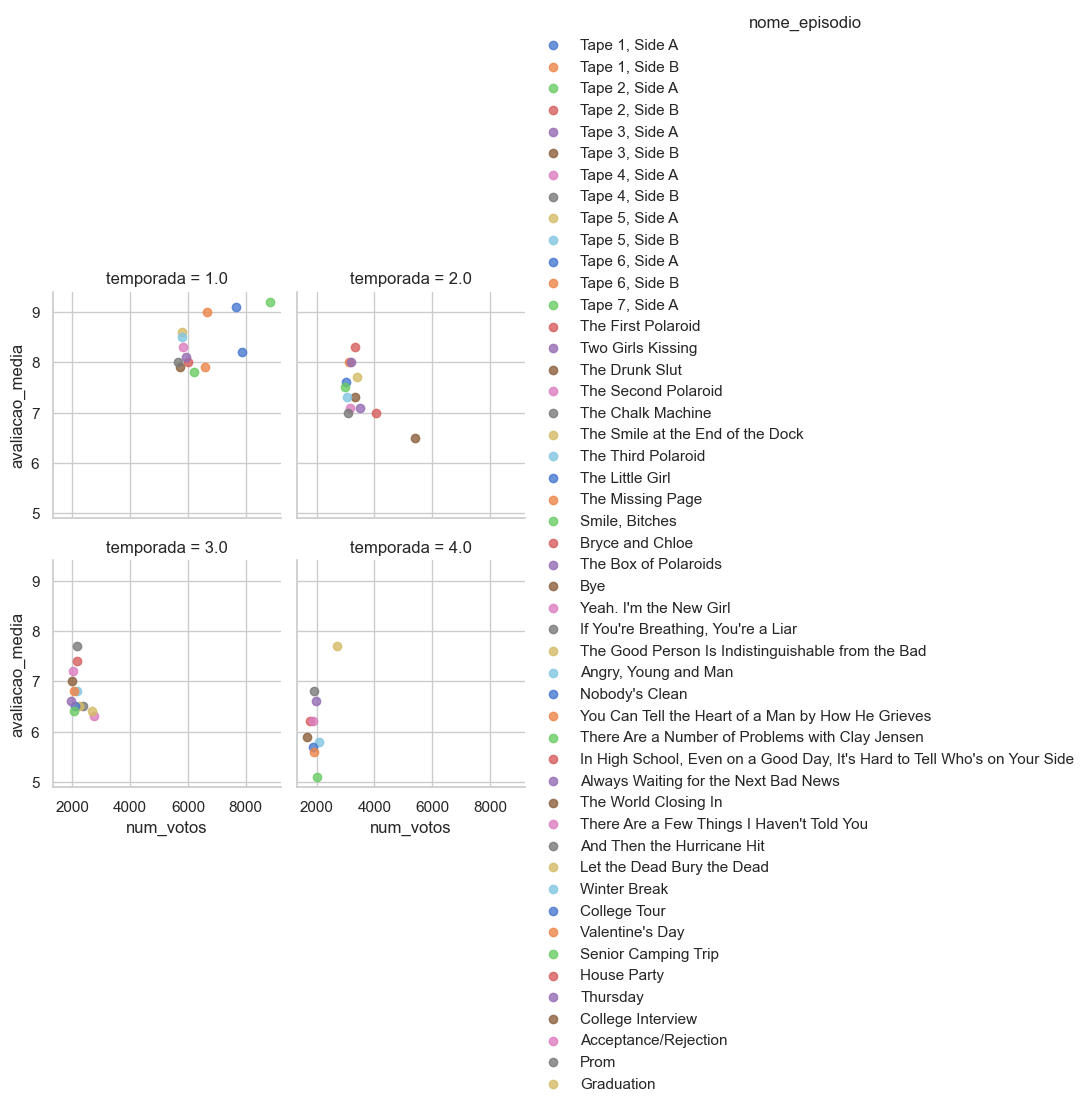

In [126]:

relacao = sns.lmplot(data= episodios, x="num_votos", y="avaliacao_media", col="temporada", height=3,
                hue="nome_episodio", col_wrap=2, palette="muted", ci=None)